In [20]:
import os

import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import random

import time

from sklearn.model_selection import train_test_split
import datetime

from scipy.io import loadmat


from DataGenerator import FullPatchGenerator, ContextualPatchGenerator, FromRawGenerator, PatchGenerator
from loses import loss_ce,loss_dice,loss_f1score,loss_focalc,loss_precision,loss_recall
from models import Generator,Lightning_Prediction,Lightning_Prediction_ConvLSTM, Lightning_Prediction_ConvLSTM_baseline, Lightning_Prediction_CARE
from callbacks import MemoryCheck

from extra import draw_images,draw_images_cartopy, draw_images_cartopy_ensemble
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
with open('EGU.pkl','rb') as file:
    d = pickle.load(file)
pred = d['pred'] 
X = d['X']
Y = d['Y']
lons = X[:,:,:,-3]
lats = X[:,:,:,-2]

/home/ehsan27770/EPFL/EMC_FRL/Prelight/code/extra.py:90: RuntimeWarning: invalid value encountered in greater
  display_list[i][display_list[i] > 0.1] = 1


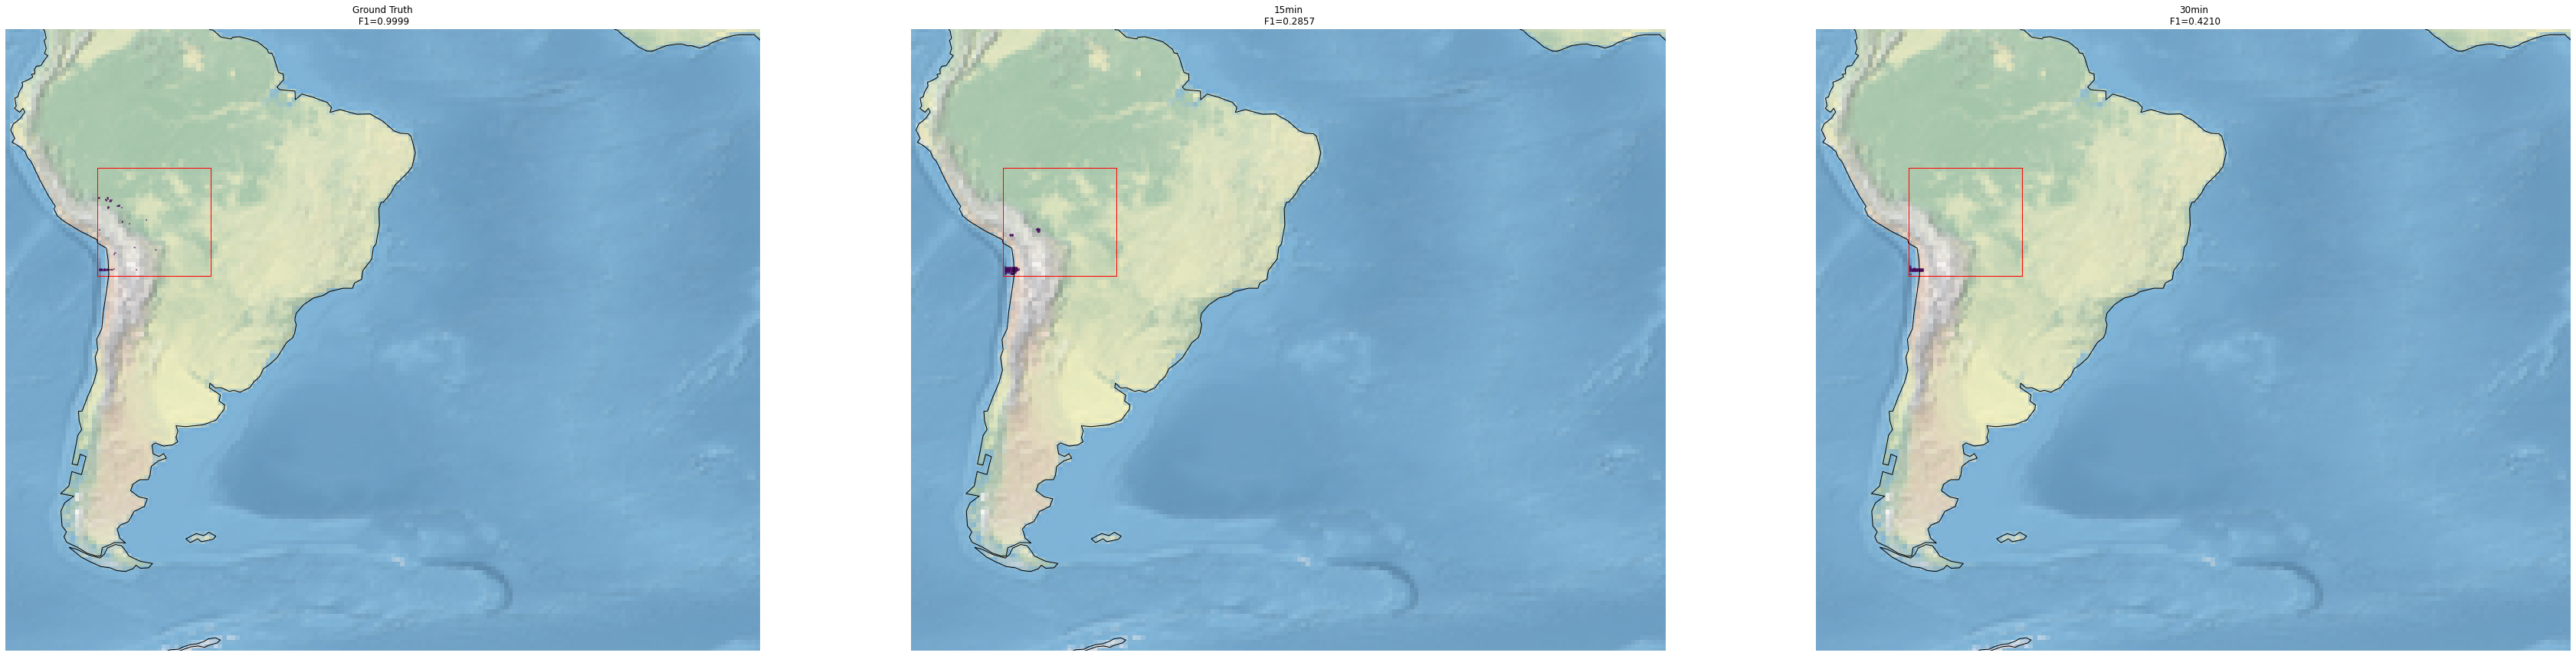

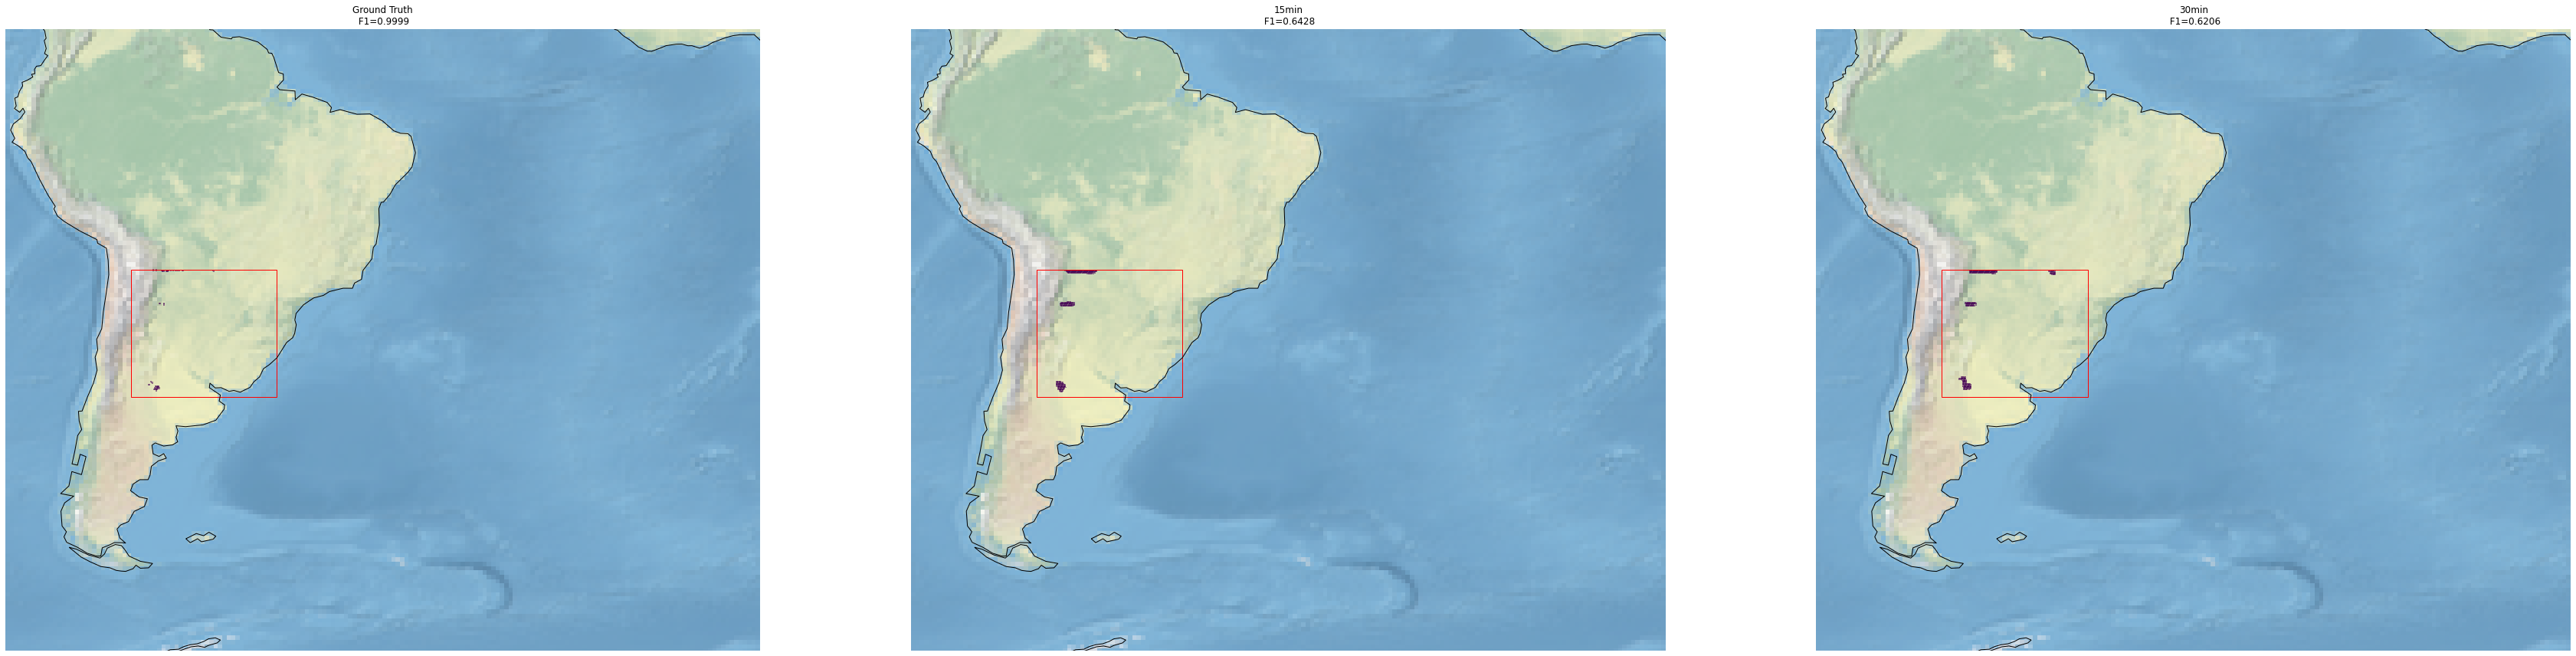

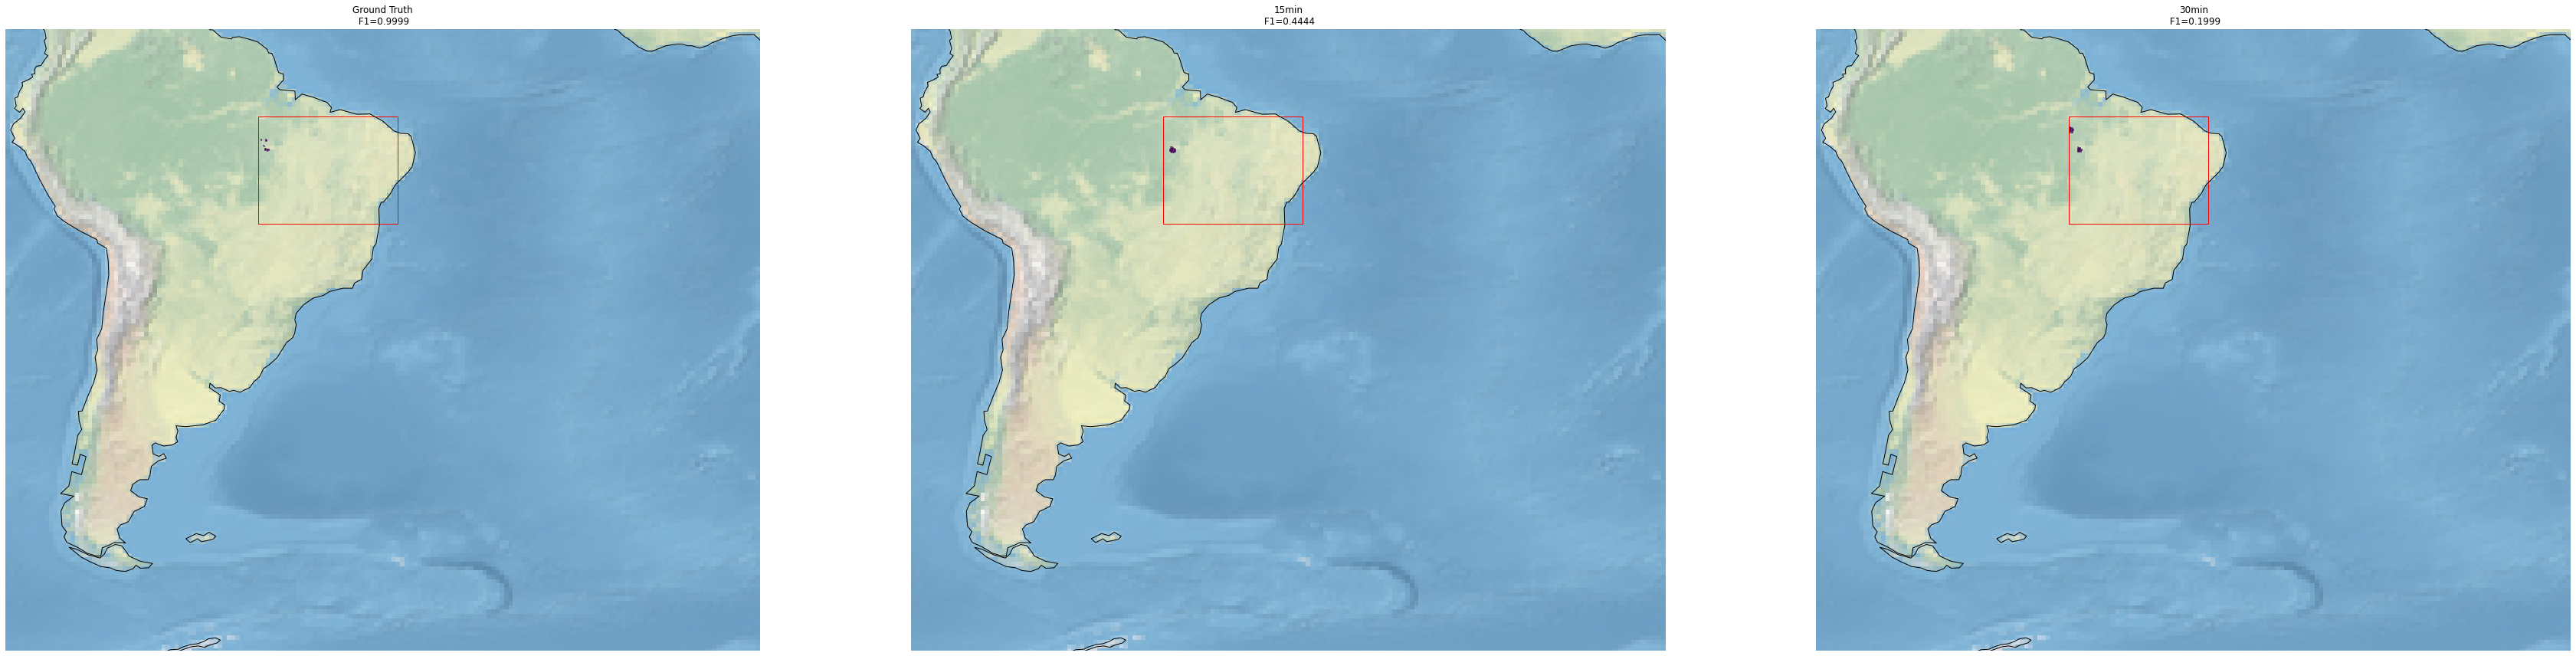

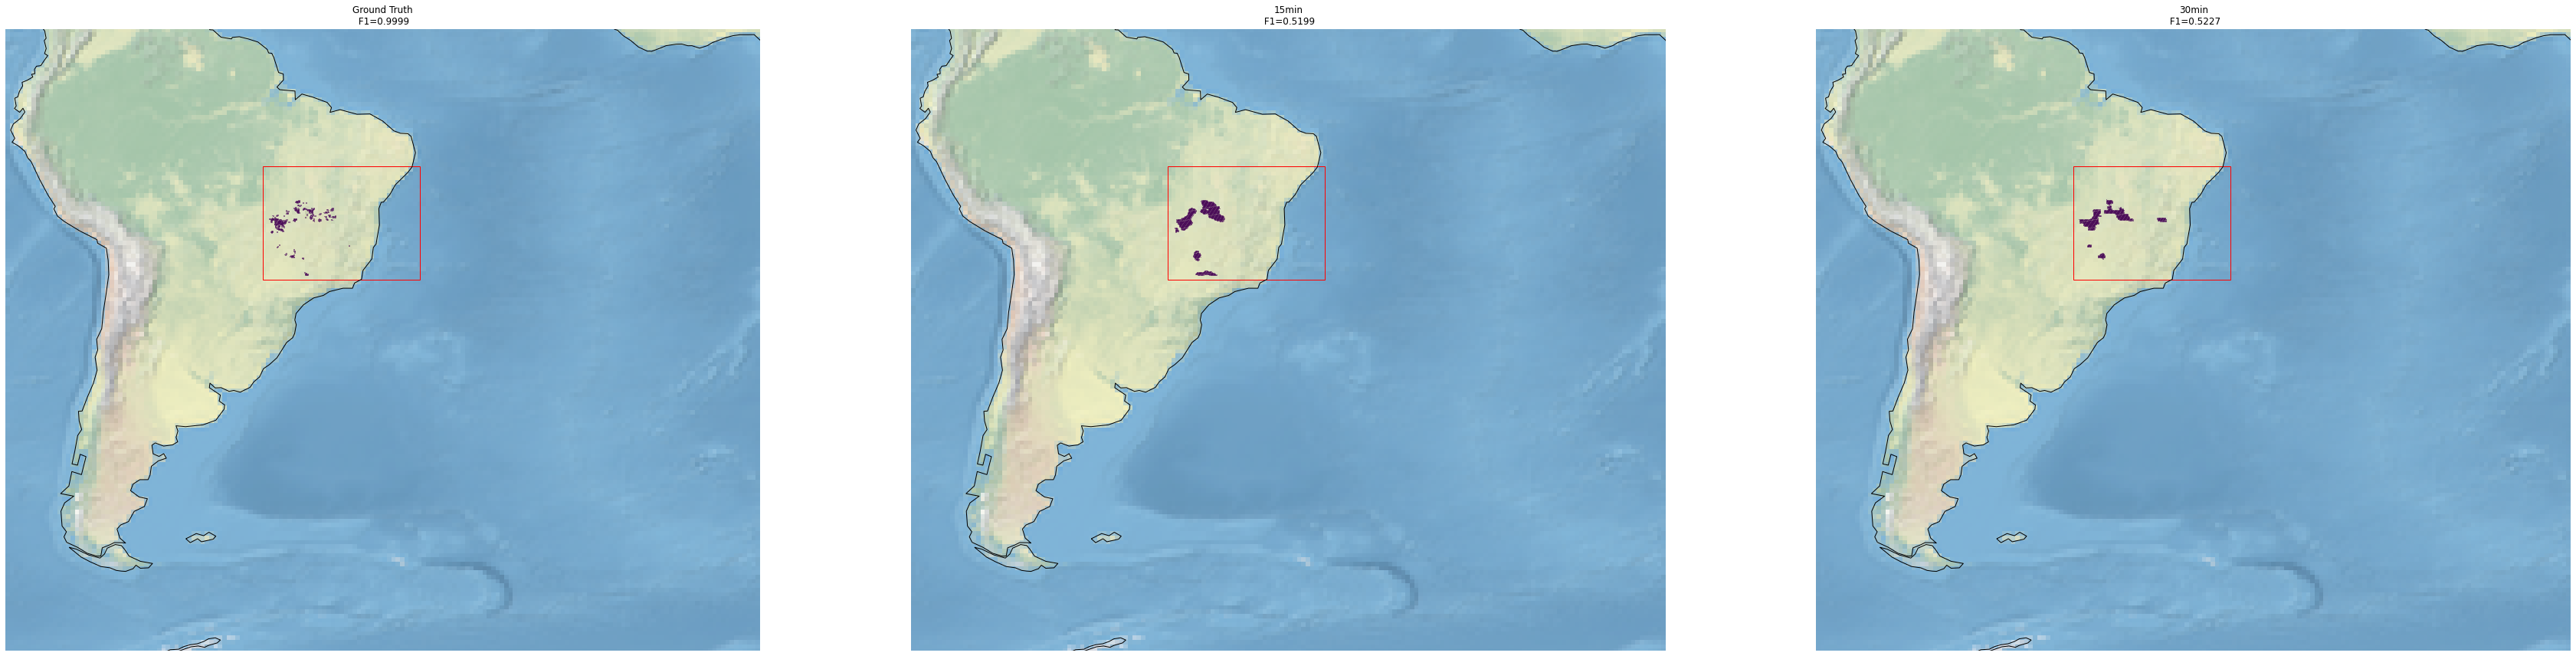

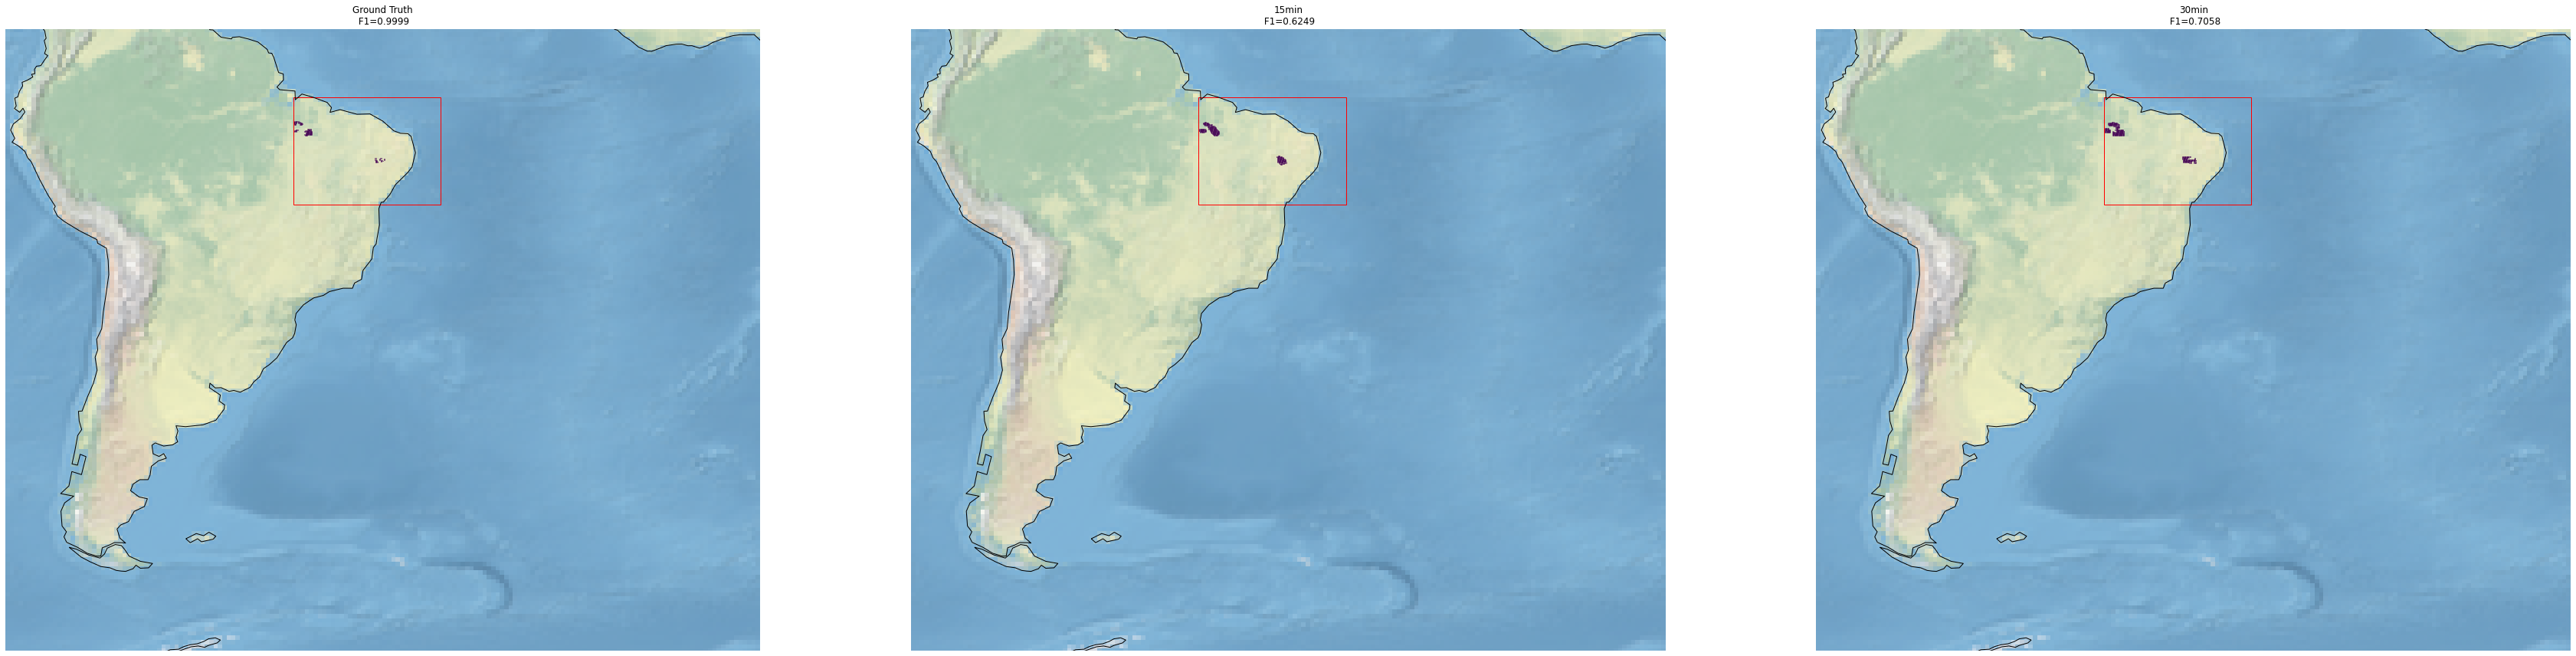

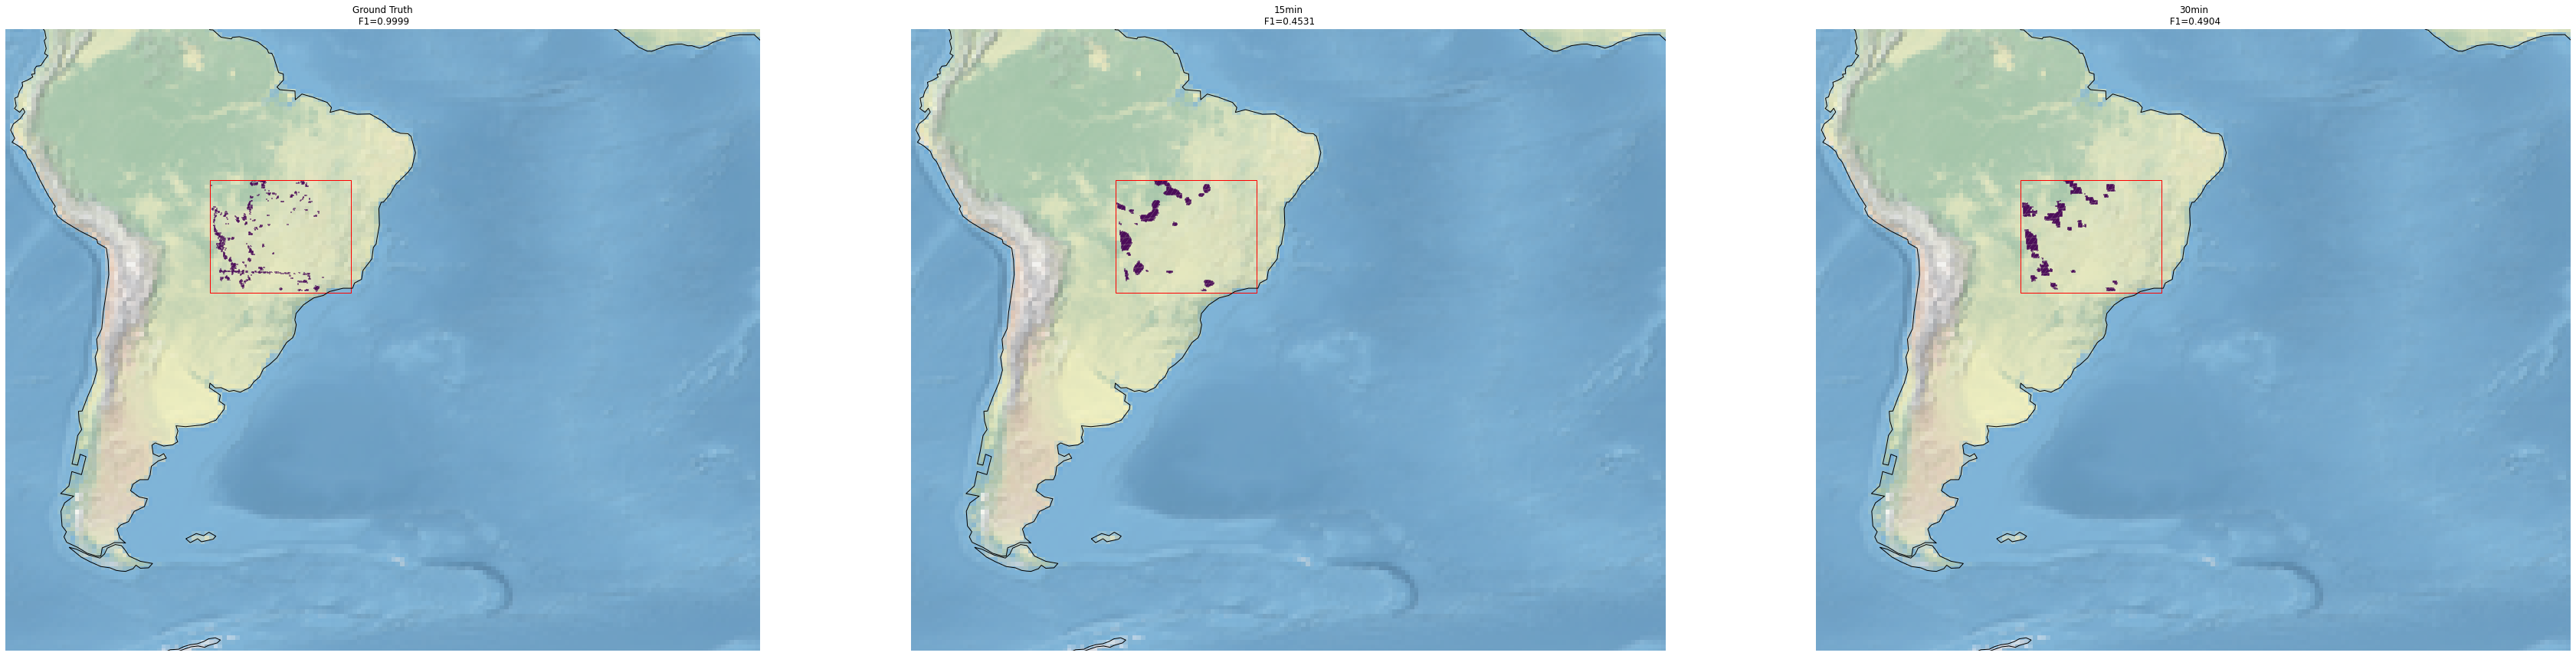

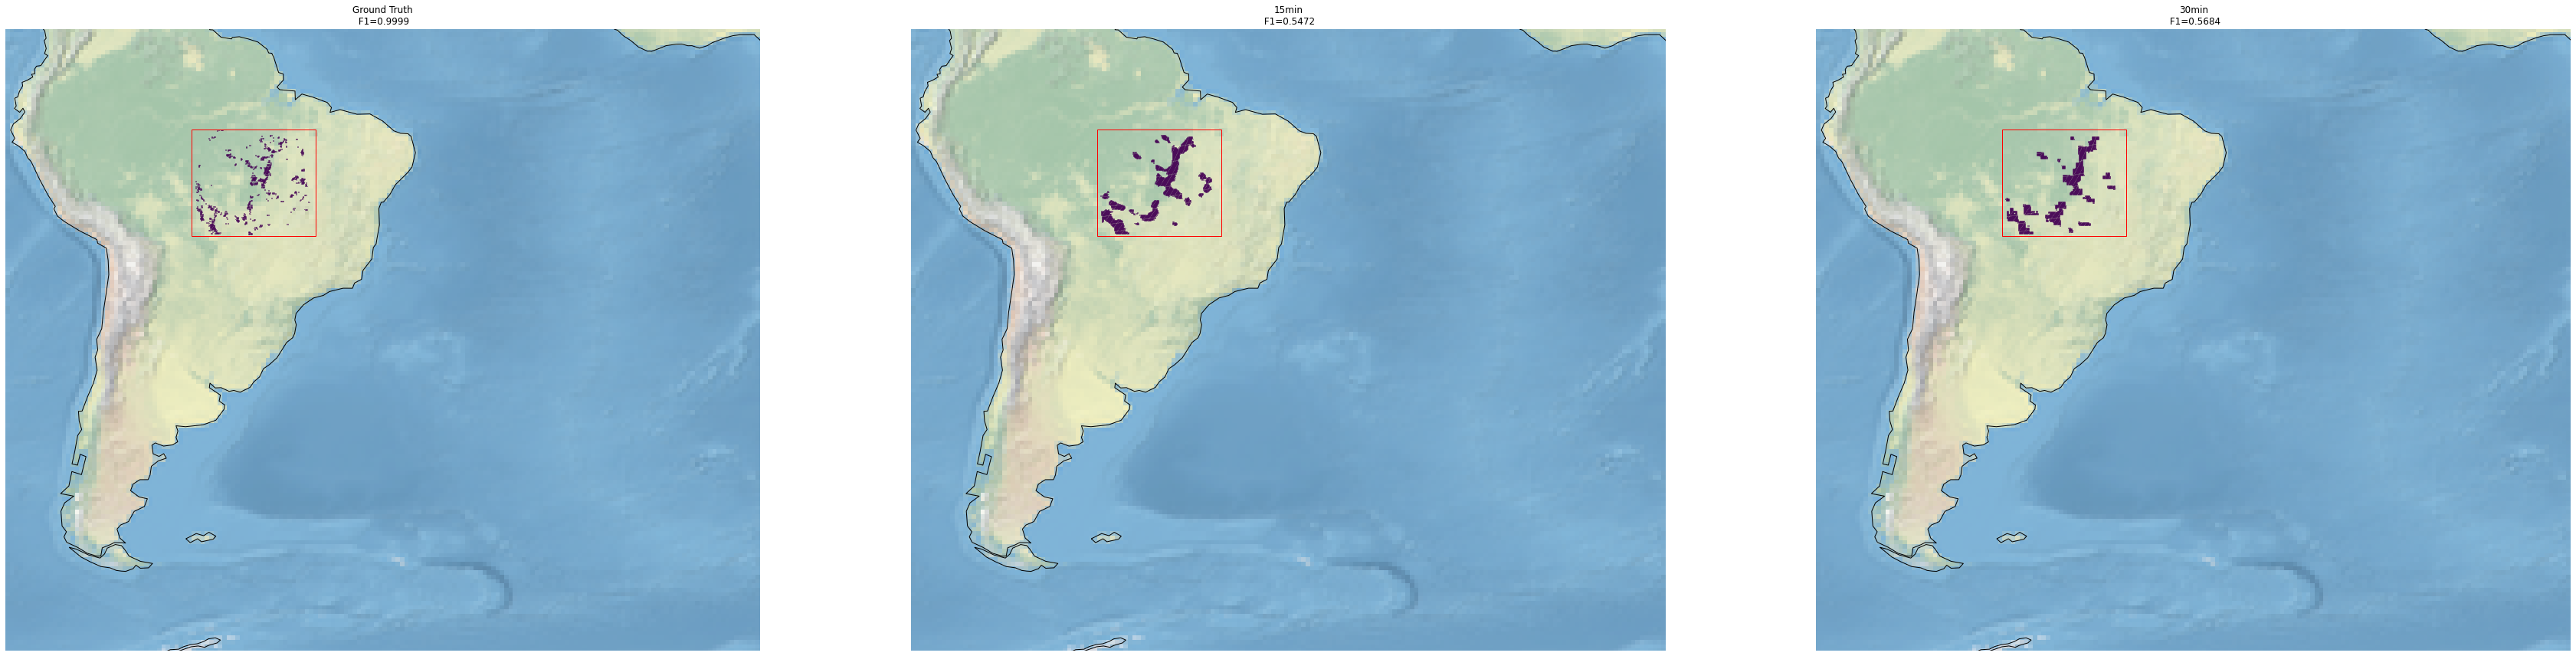

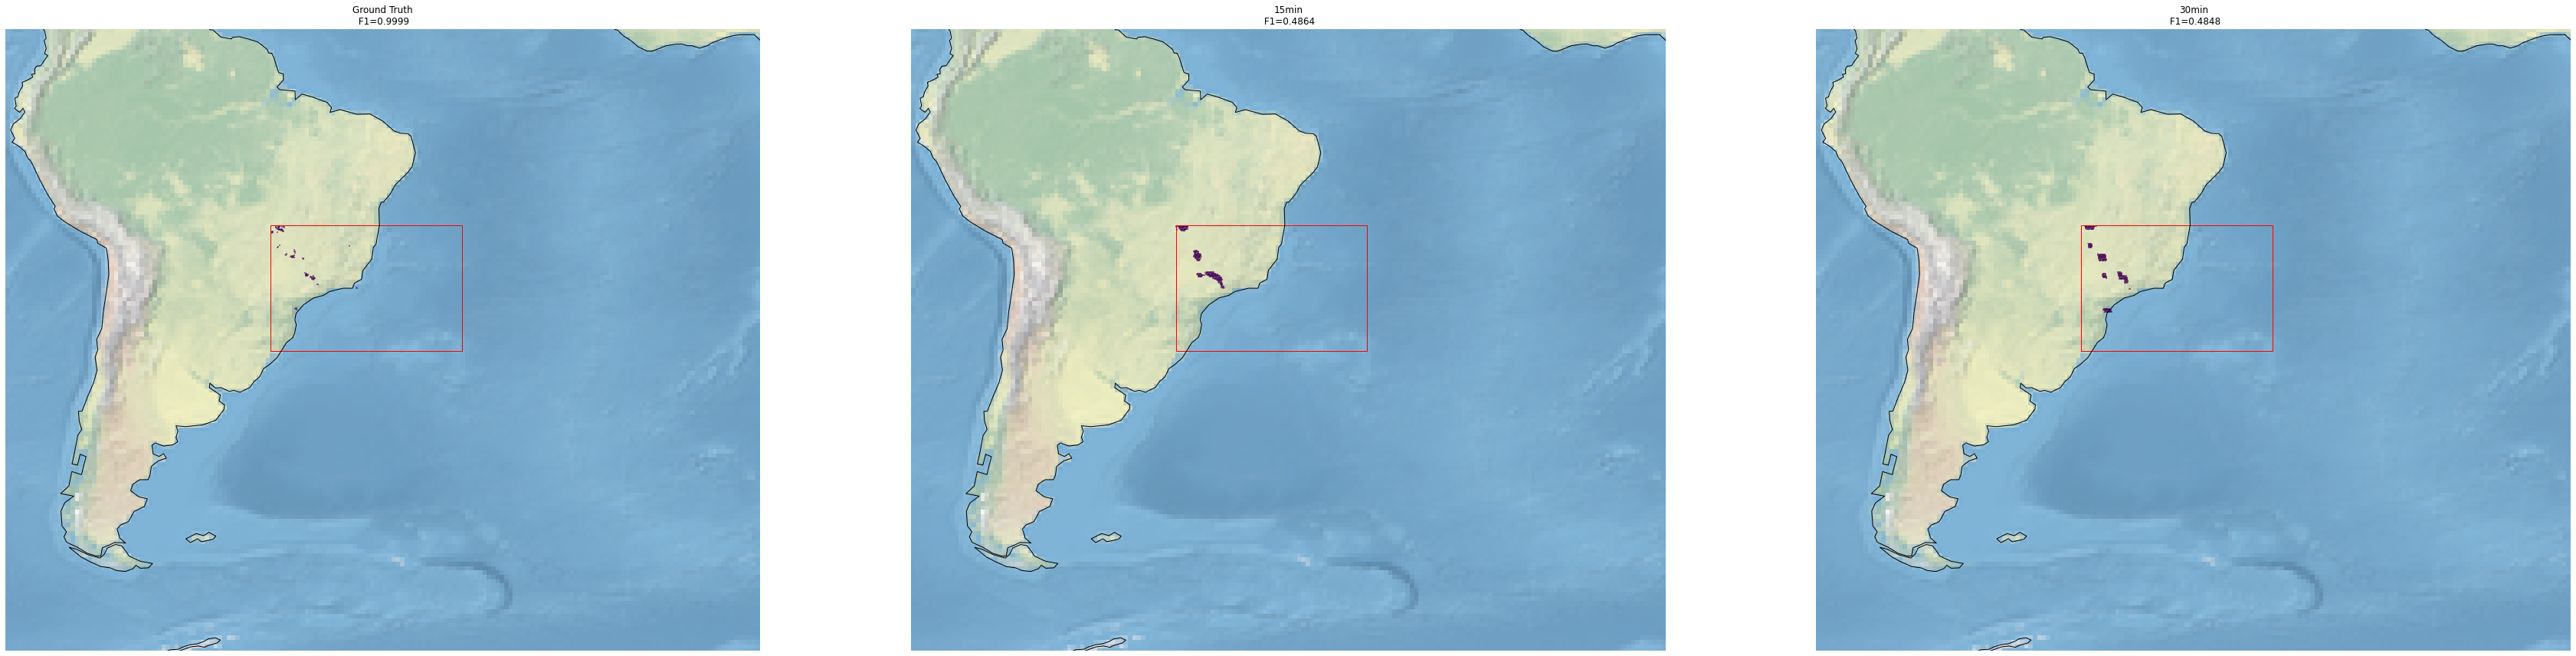

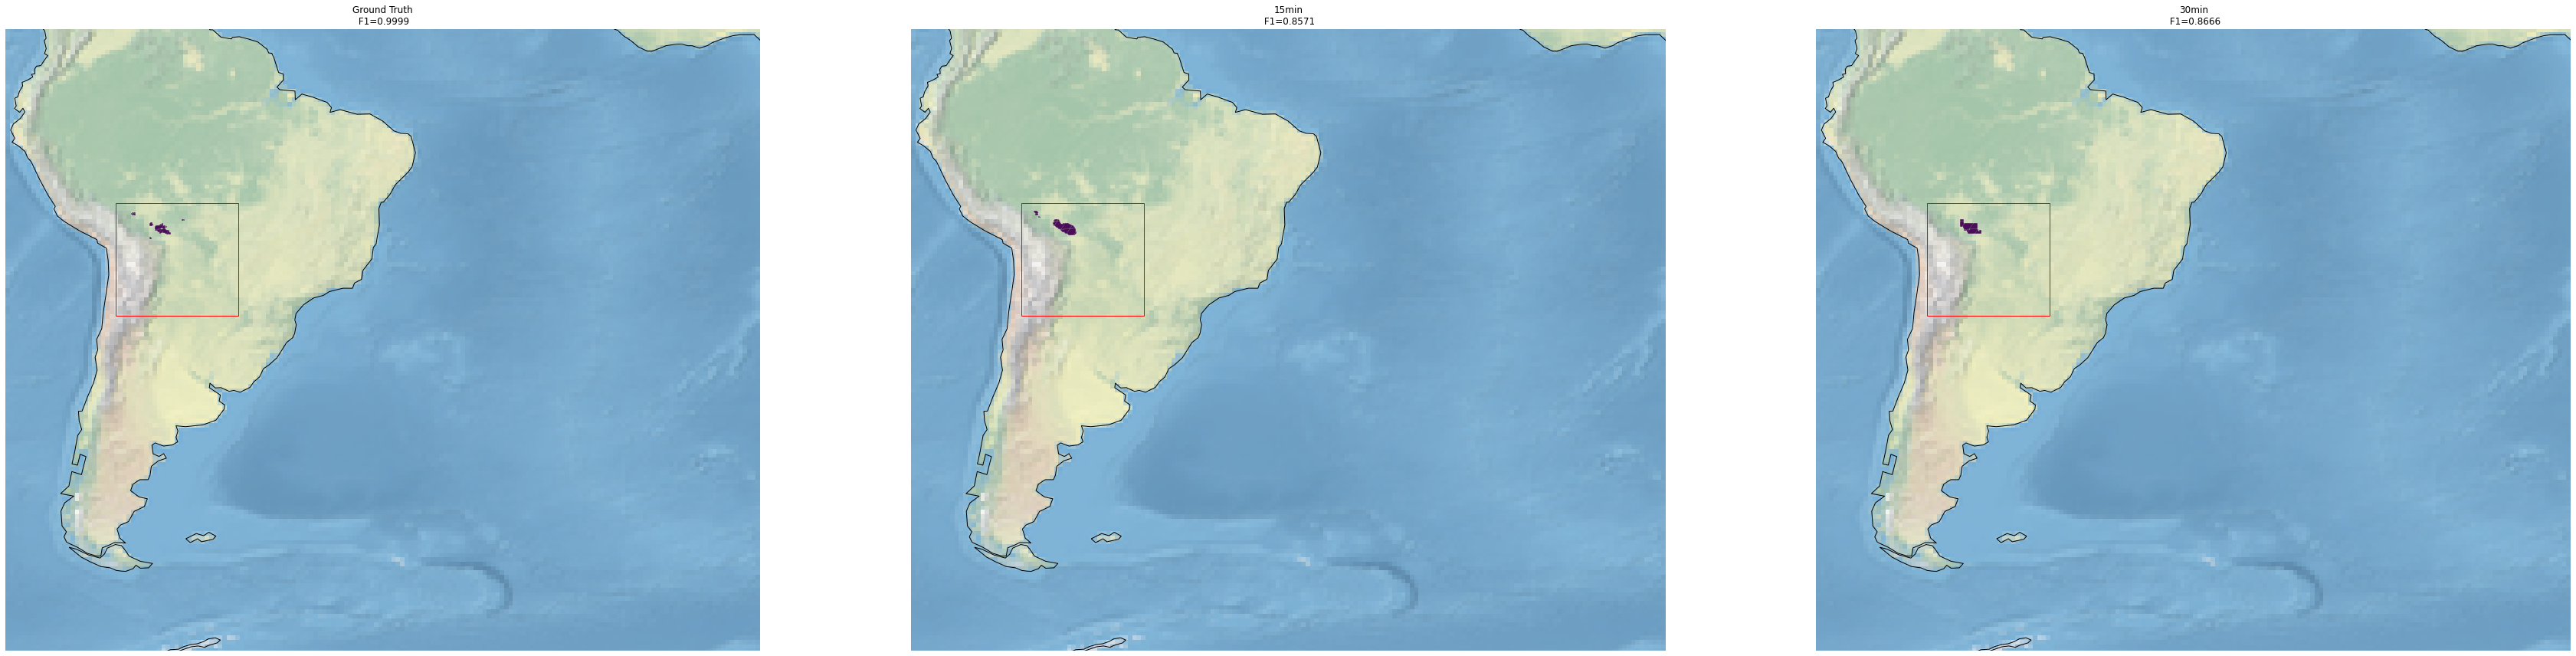

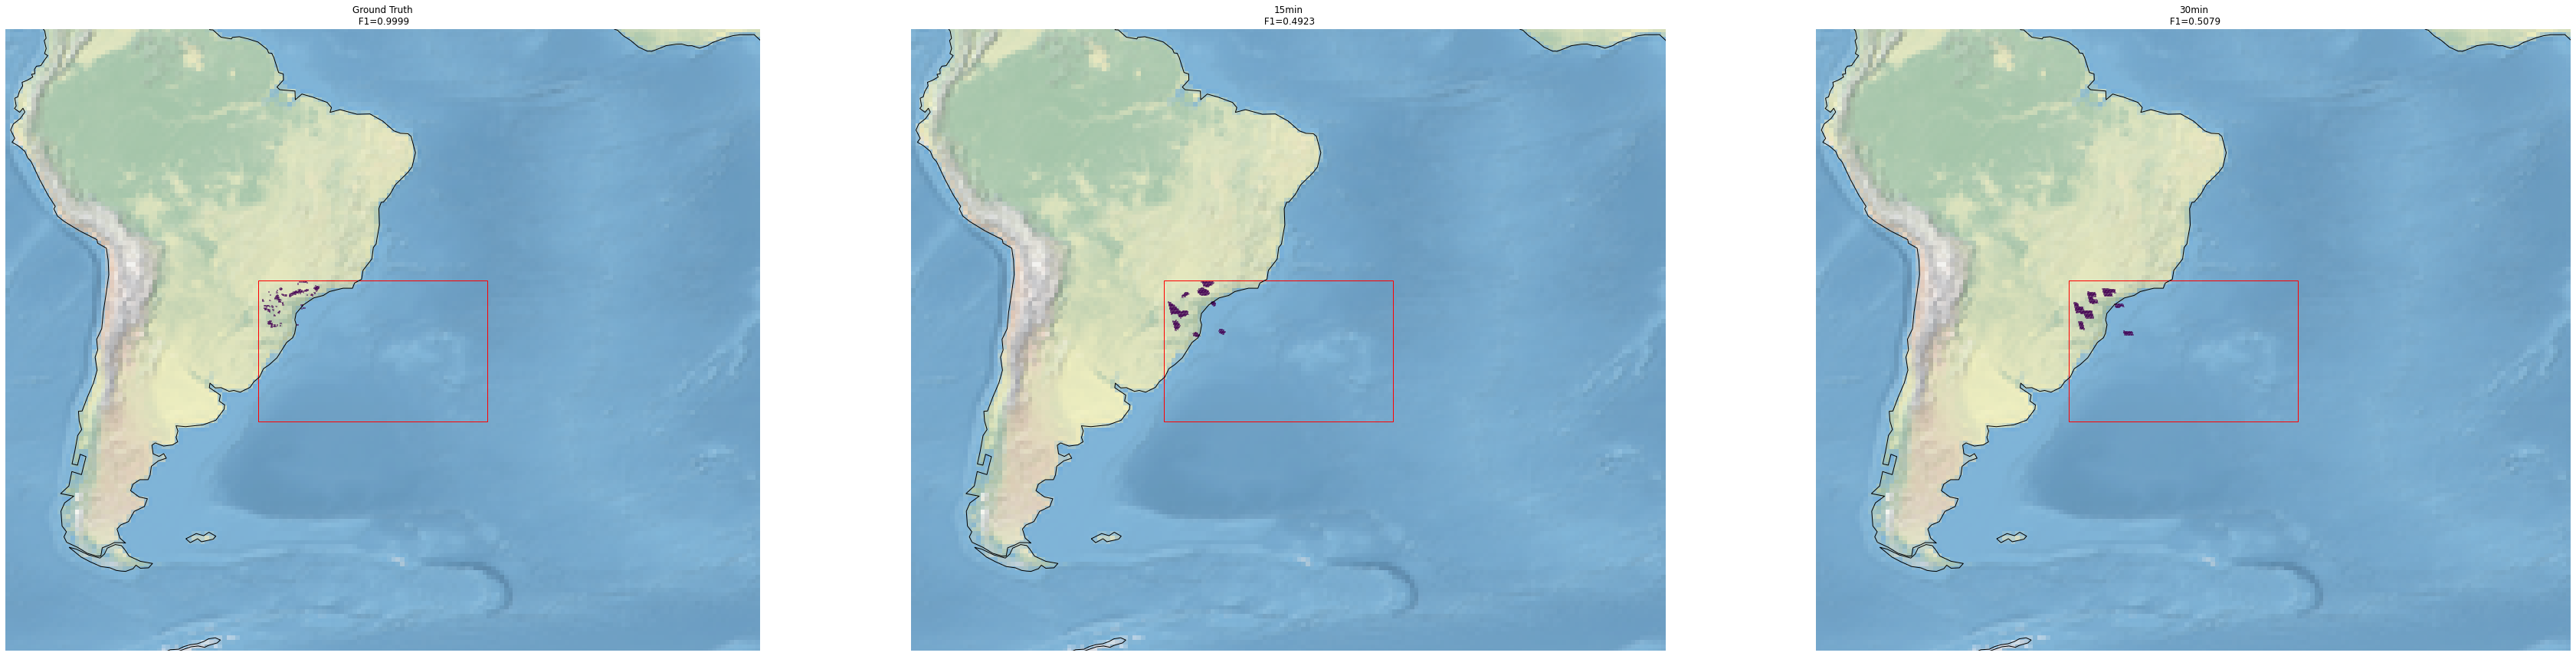

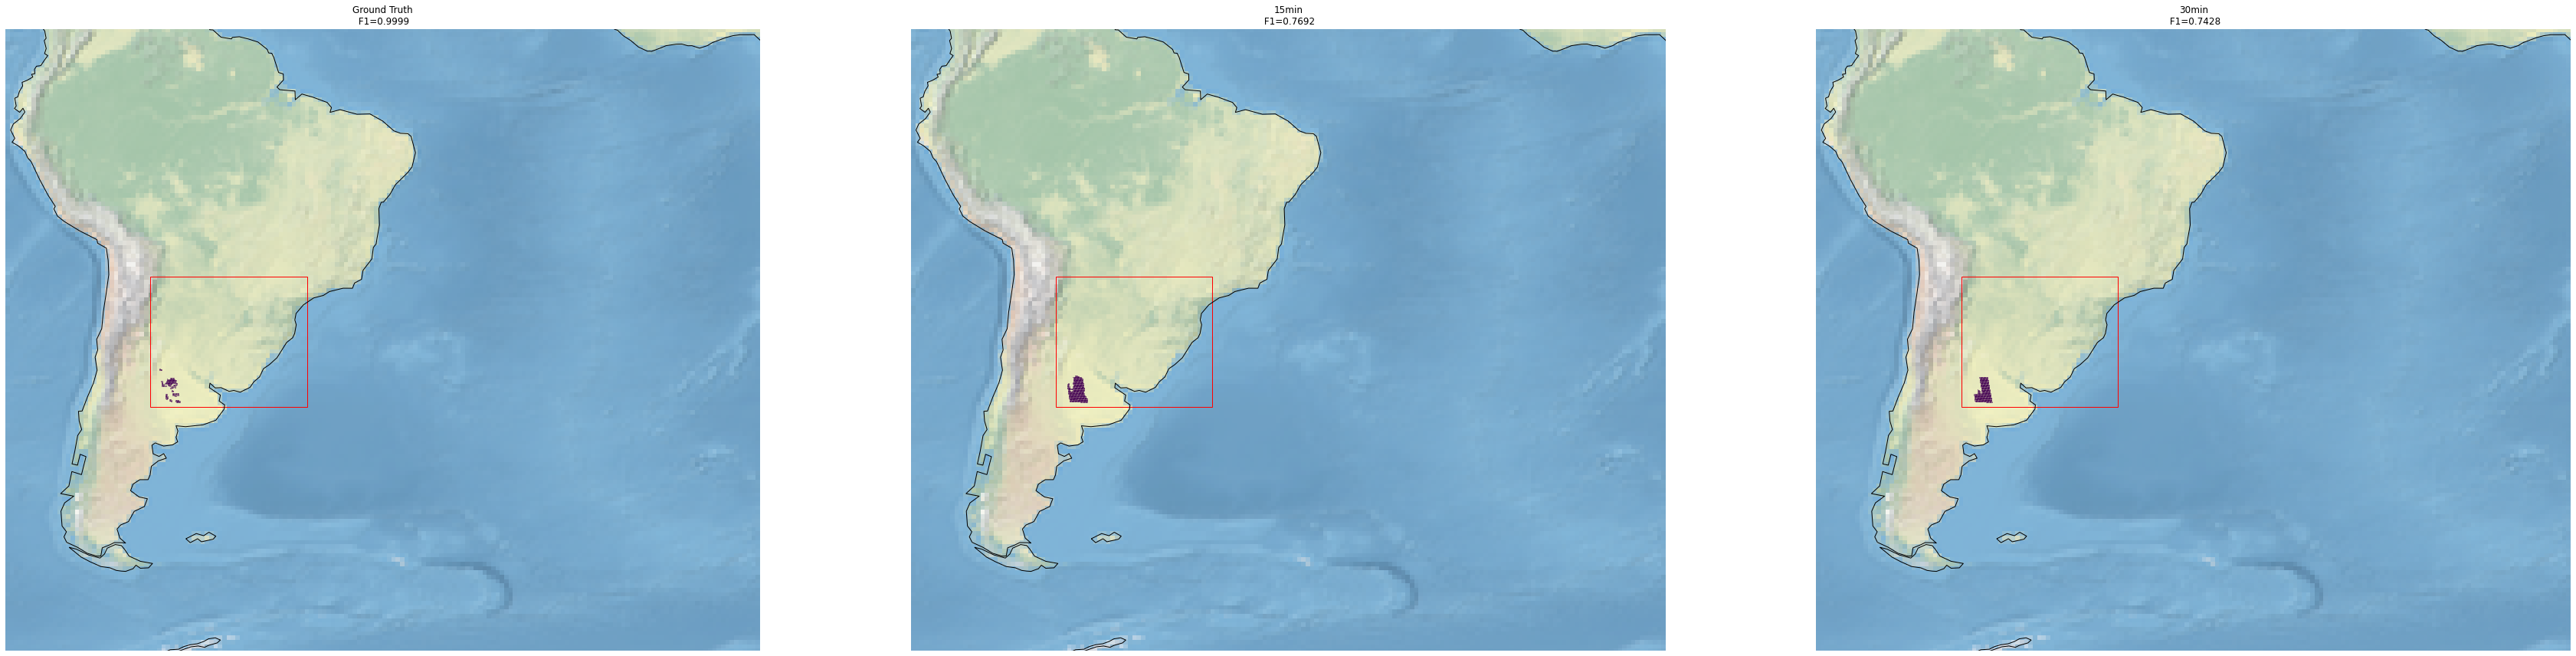

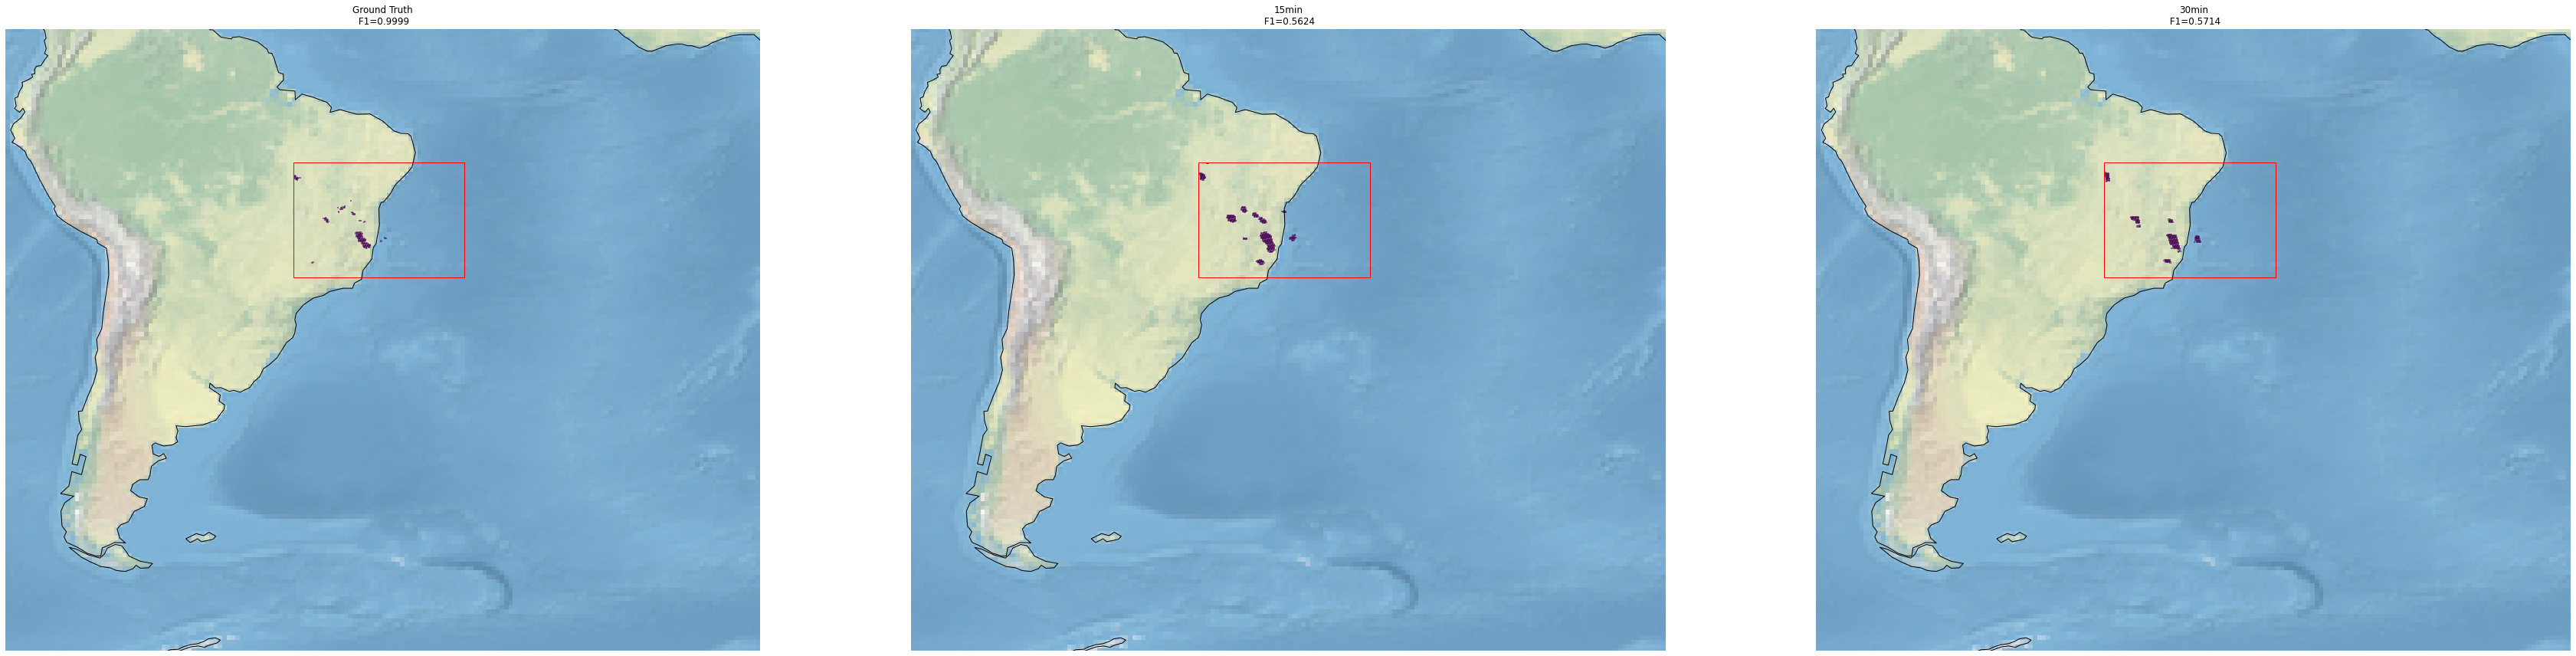

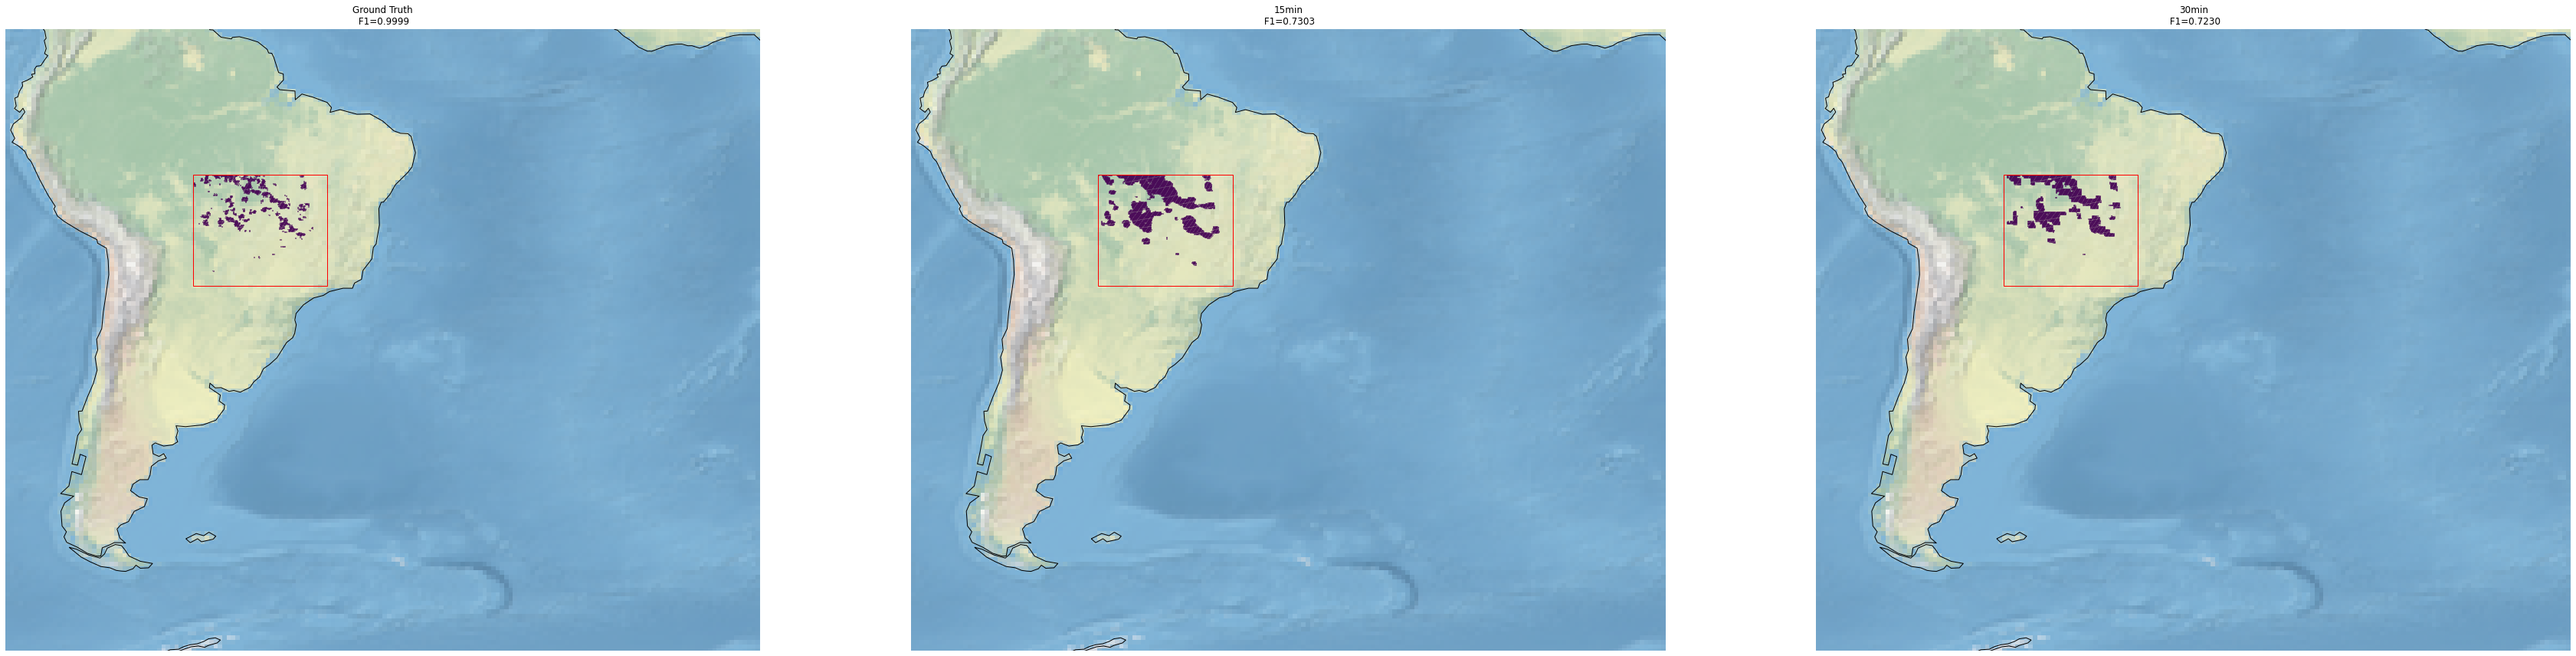

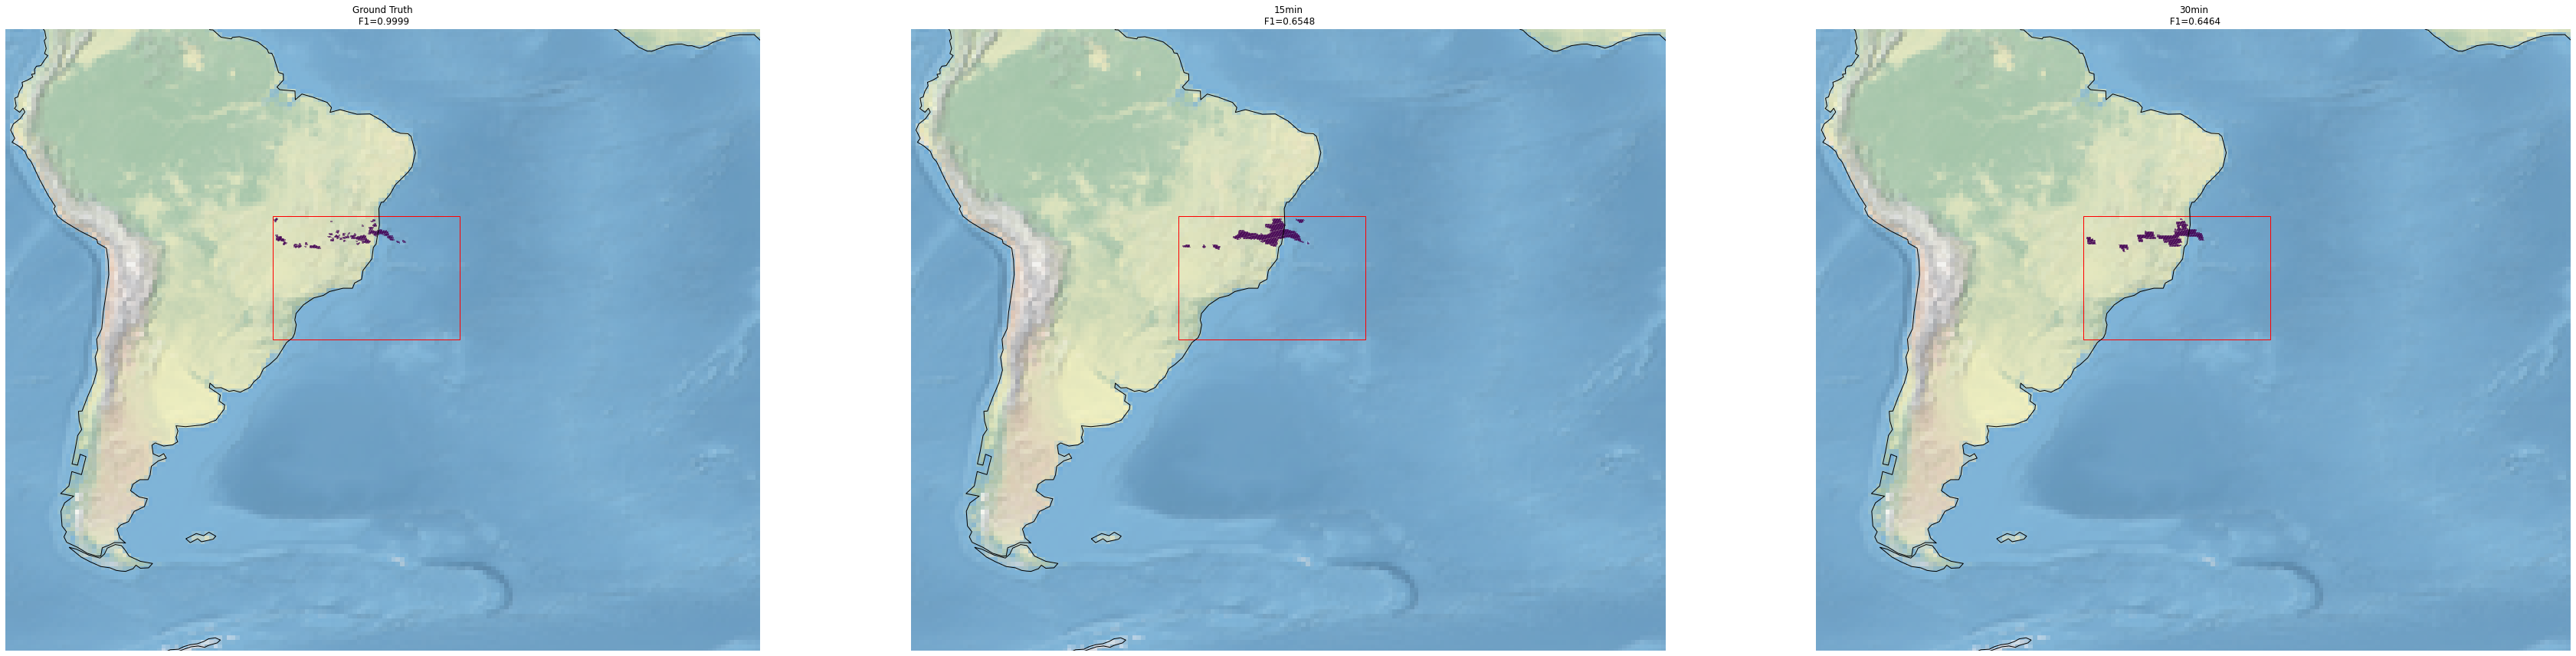

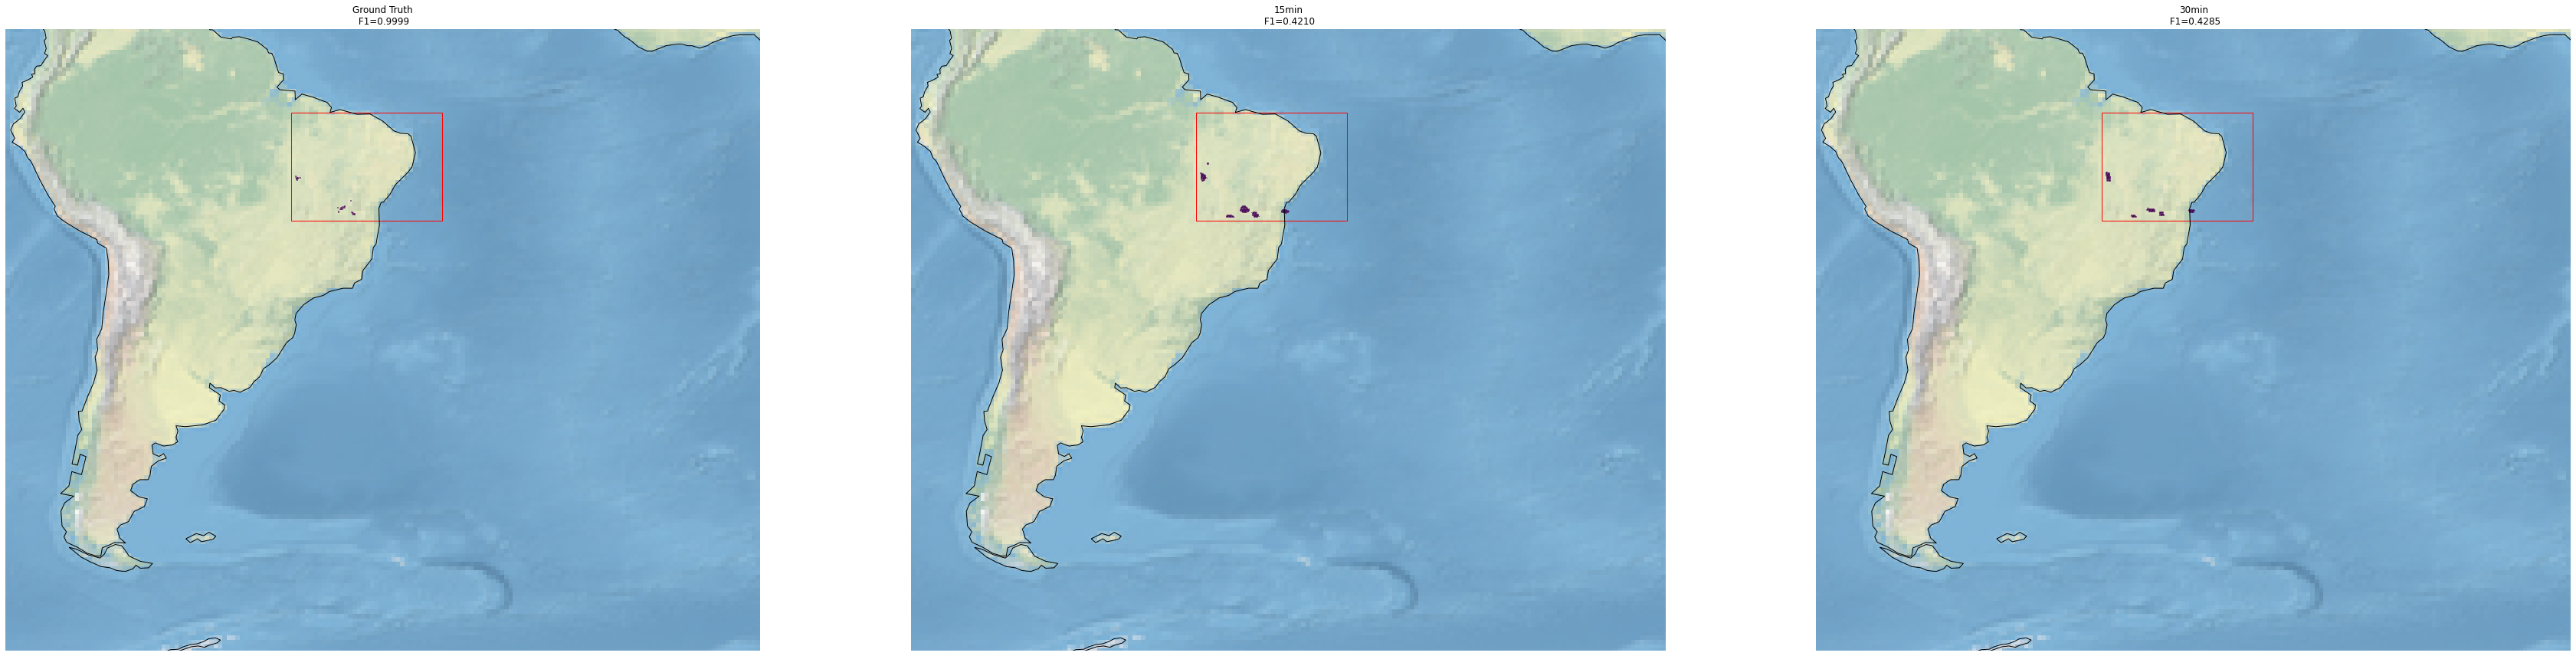

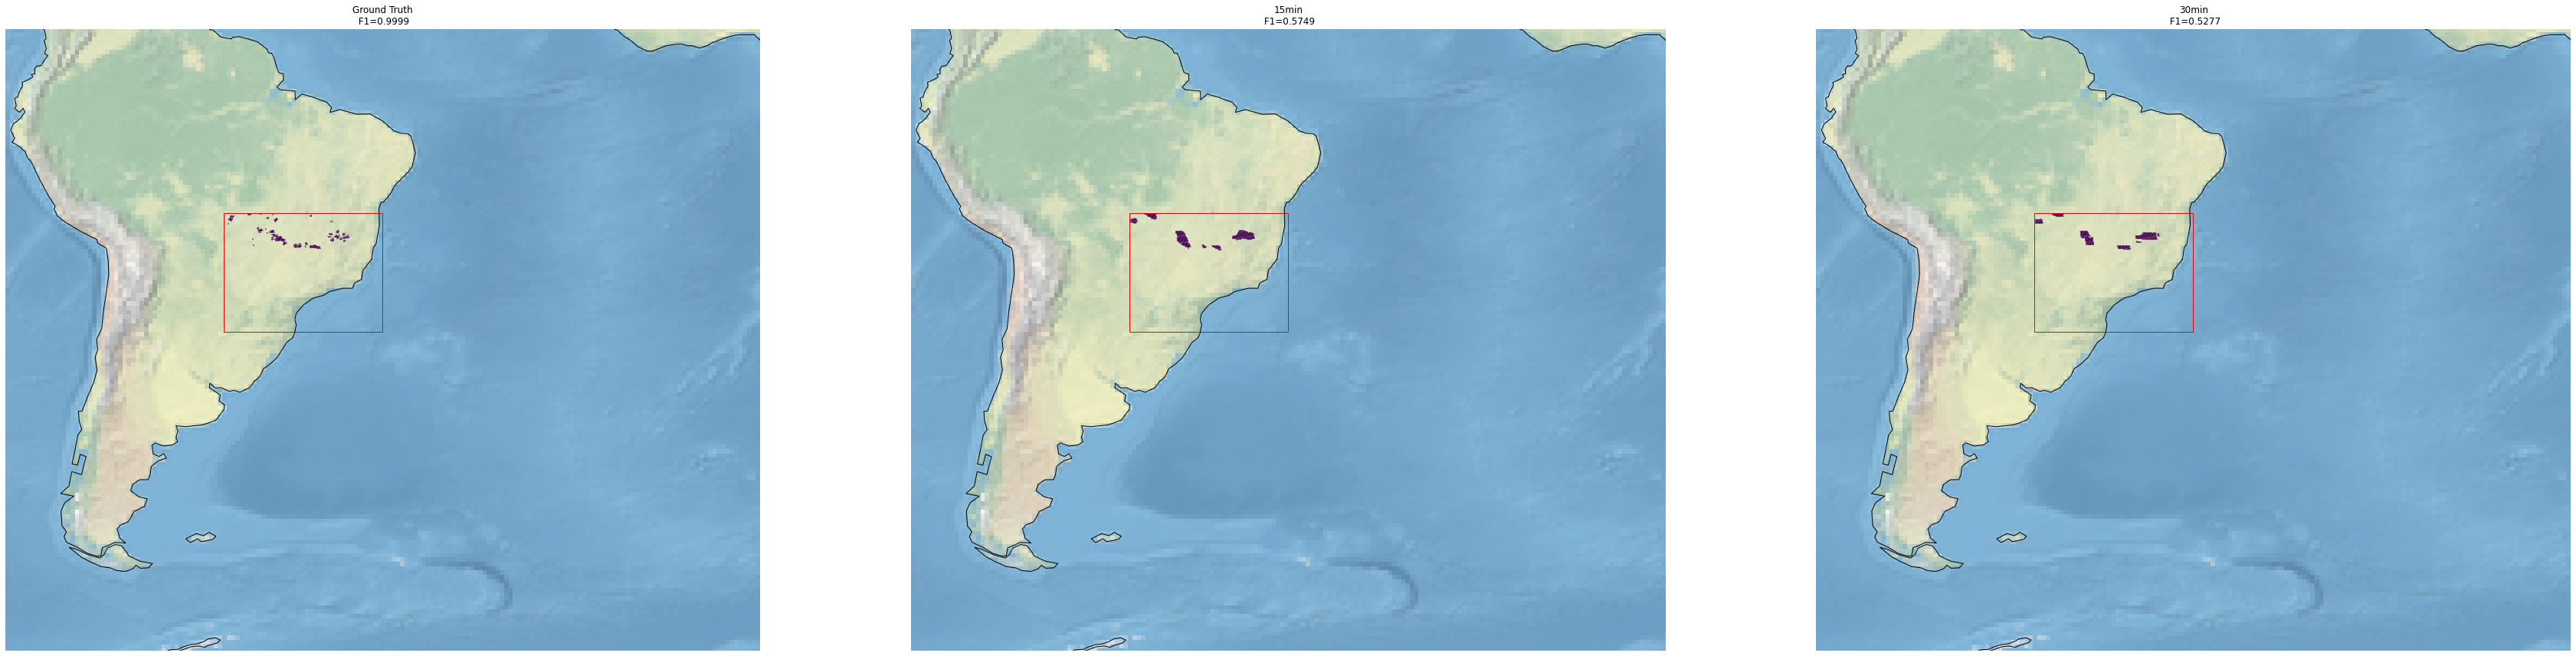

In [5]:
numPatches = 16
for i in range(numPatches):
    #display_list = [ Y[i,:,:,0].astype("float32") ] + [ X[i,:,:,-4].astype("float32") ] + [pred[j][i,:,:,0] for j in range(len(pred))]
    display_list = [ Y[i,:,:,0].astype("float32") ] + [pred[j][i,:,:,0] for j in range(len(pred)-1)]
    lon = lons[i,:,:]
    lat = lats[i,:,:]
    f1_score = [tf.keras.backend.get_value(loss_f1score(np.expand_dims(display_list[j],(0,3)),np.expand_dims(display_list[0],(0,3)))) for j in range(len(display_list))]
    #title = ['Ground Truth', 'Persistence', '15min', '30min', '45min']
    title = ['Ground Truth', '15min', '30min']
    title_final = [zip1+'\n F1={:.4f}'.format(zip2) for (zip1,zip2) in list(zip(title,f1_score))]
    draw_images_cartopy(display_list,lon,lat,title=title_final,name=str(i))

3

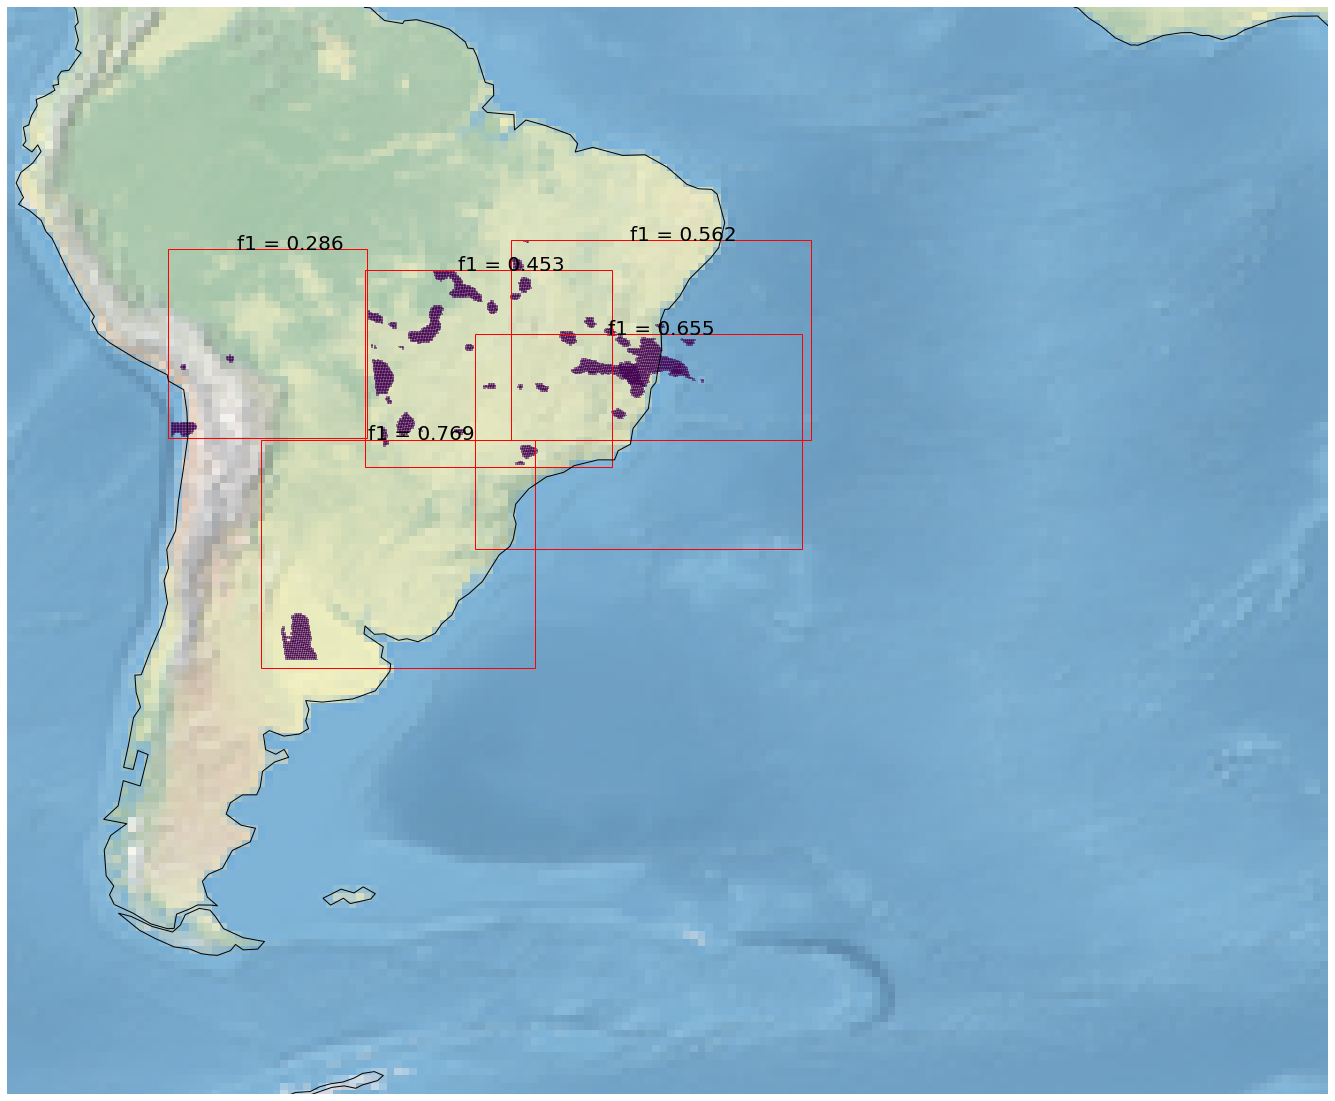

In [22]:
#index_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

index_list = [0,5,10,11,13]
target_list = [ Y[i,:,:,0].astype("float32") for i in index_list]
display_list = [ pred[0][i,:,:,0] for i in index_list]
lon_list = [ lons[i,:,:] for i in index_list]
lat_list = [ lats[i,:,:] for i in index_list]
f1_list = [tf.keras.backend.get_value(loss_f1score(np.expand_dims(display_list[i],(0,3)),np.expand_dims(target_list[i],(0,3)))) for i in range(len(display_list))]

draw_images_cartopy_ensemble(display_list,lon_list,lat_list,f1_list=f1_list,name='15min_f1')
#for i in range(numPatches):
    
    #display_list = [ Y[i,:,:,0].astype("float32") ] + [pred[j][i,:,:,0] for j in range(len(pred)-1)]
    
    #f1_score = [tf.keras.backend.get_value(loss_f1score(np.expand_dims(display_list[j],(0,3)),np.expand_dims(display_list[0],(0,3)))) for j in range(len(display_list))]
    #title = ['Ground Truth', 'Persistence', '15min', '30min', '45min']
    #title = ['Ground Truth', '15min', '30min']
    #title_final = [zip1+'\n F1={:.4f}'.format(zip2) for (zip1,zip2) in list(zip(title,f1_score))]
    #draw_images_cartopy(display_list,lon,lat,title=title_final,name=str(i))